In [174]:
import pymongo
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

![title](static/image/lat_lon.svg)

In [176]:
# Initialize PyMongo to work with MongoDBs
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

# Define database and collection
db = client.scooters_DB
scooters=db.scooter_docs
log=db.log

In [167]:
log=list(log.find())

In [168]:
len(log)

927

In [169]:
log[0]

{'_id': ObjectId('605e324f9a4d337eaa356329'),
 'time': 1616785999.039095,
 'jobname': 'P86XcW24n5B1amHeJJ4c3g',
 'last_updated': 1616785870,
 'len': 985,
 'status': 'success',
 'name': 'lyft',
 'size': 7984}

In [170]:
log_df=pd.DataFrame(log)
log_df=log_df.drop(columns=['_id'])

In [9]:
log_df.columns

Index(['time', 'jobname', 'last_updated', 'len', 'status', 'name', 'size'], dtype='object')

In [171]:
log_df.tail(20)

,time,jobname,last_updated,len,status,name,size
907,1.616949e+09,R6ooWCsJmlnyWp_jnM-hjQ,1616949040,311,success,capitalbikeshare,2896
908,1.616949e+09,RnCKzvDsmJxEsssfBwRX2Q,NA,0,failed,bolt,0
909,1.616949e+09,YQ-y8L0-mtymh_LOWrEbZQ,1616948764,802,success,lyft,7056
910,1.616949e+09,h-gpsEwJyf8hvxxDw2rJGQ,1616949020,2326,success,lime,18672
911,1.616949e+09,TtmamuamKWE7uu7PE0ObEQ,1616949050,1642,success,spin,14680
912,1.616949e+09,20eaX7C_flw_sm11gAQ1BQ,NA,0,failed,skip,0
913,1.616949e+09,8BzP112I_oPWFC-SriAjMA,NA,558,success,bird,4848
914,1.616949e+09,_geNsPiQjmiZazTFGc42JA,NA,0,failed,razor,0
915,1.616949e+09,mwq0zNnxYqOItKafgQG9Vw,1616949052965,1072,success,helbiz,9024
916,1.616949e+09,qrmTq74h1JSAkyfyz8y6CA,1616949045,311,success,capitalbikeshare,2896


In [173]:
(802+2326+1642+558+1072+331)*220/1000000

1.48082

,time,jobname,last_updated,len,status,name,size,previous_last_updated,diff
0,1.616786e+09,P86XcW24n5B1amHeJJ4c3g,1616785870,985,success,lyft,7984,NaN,NaN
7,1.616786e+09,NVEDWZfUWJym31f8ubFw7g,1616786174,978,success,lyft,7984,1616785870,304
14,1.616787e+09,2nWK6dRuoyEBGwbUIGII0A,1616786480,984,success,lyft,7984,1616786174,306
21,1.616787e+09,JYkjVjvHwjP4-gWgKGGNUw,1616786850,966,success,lyft,7984,1616786480,370
28,1.616787e+09,aQ5uVext3CsNTk9b8aeMgg,1616787060,974,success,lyft,7984,1616786850,210


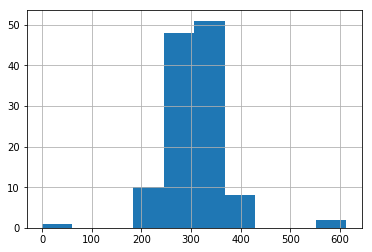

In [11]:
lyft_df=log_df[log_df['name']=='lyft']
lyft_df['previous_last_updated']=lyft_df['last_updated'].shift(1)
lyft_df['diff']=lyft_df['last_updated']-lyft_df['previous_last_updated']
display(lyft_df.head())
lyft_df['diff'].dropna().astype(int).hist()

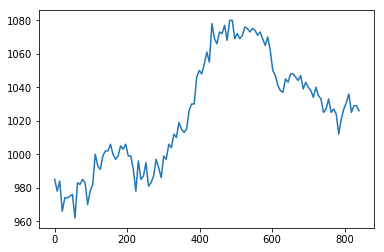

In [12]:
lyft_df['len'].plot()

In [13]:
log_df['time']=pd.to_datetime(log_df['time'], unit='s')
log_df[['time', 'len', 'name']].pivot_table(index='time', columns='name', values='len').fillna(method='bfill').drop(columns=['razor', 'weather'])#.plot()

name,bird,lime,lyft,skip,spin
time,,,,,
2021-03-26 19:13:19.039094925,675.0,3038.0,985.0,0.0,2062.0
2021-03-26 19:13:20.540954828,675.0,3038.0,978.0,0.0,2062.0
2021-03-26 19:13:21.506874084,675.0,3038.0,978.0,0.0,2062.0
2021-03-26 19:13:21.889271021,675.0,3038.0,978.0,0.0,2069.0
2021-03-26 19:13:22.551476002,675.0,3038.0,978.0,0.0,2069.0
...,...,...,...,...,...
2021-03-27 05:18:20.063822031,727.0,NaN,NaN,0.0,1932.0
2021-03-27 05:18:20.407971144,727.0,NaN,NaN,0.0,NaN
2021-03-27 05:18:20.957649946,727.0,NaN,NaN,NaN,NaN


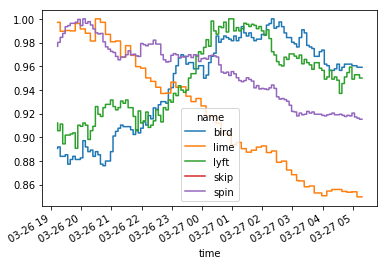

In [14]:
test=log_df[['time', 'len', 'name']].pivot_table(index='time', columns='name', values='len').fillna(method='bfill').drop(columns=['razor', 'weather'])
test.divide(test.max()).plot()

In [16]:
scooters=list(scooters.find())

In [17]:
len(scooters)

794776

In [18]:
scooters[0]

{'_id': ObjectId('605e324e9a4d337eaa355f50'),
 'lat': 38.9096405,
 'type': 'electric_scooter',
 'bike_id': 'a1d134bcb09732e62cc0de48be3c0763',
 'lon': -77.03206383333334,
 'rental_uris': {'ios': 'https://dc.lft.to/lastmile_qr_scan',
  'android': 'https://dc.lft.to/lastmile_qr_scan'},
 'name': 'a1d134bcb09732e62cc0de48be3c0763',
 'is_reserved': 0,
 'is_disabled': 0,
 'jobname': 'P86XcW24n5B1amHeJJ4c3g'}

In [163]:
scooters_df.dtypes

lat               object
type              object
bike_id           object
lon               object
name              object
is_reserved       object
is_disabled       object
jobname           object
vehicle_type      object
battery_level    float64
dtype: object

In [19]:
scooters_df=pd.DataFrame(scooters)

In [20]:
scooters_df.columns

Index(['_id', 'lat', 'type', 'bike_id', 'lon', 'rental_uris', 'name',
       'is_reserved', 'is_disabled', 'jobname', 'vehicle_type',
       'battery_level'],
      dtype='object')

In [21]:
scooters_df=scooters_df.drop(columns=['_id', 'rental_uris'])
scooters_df

,lat,type,bike_id,lon,name,is_reserved,is_disabled,jobname,vehicle_type,battery_level
0,38.9096,electric_scooter,a1d134bcb09732e62cc0de48be3c0763,-77.0321,a1d134bcb09732e62cc0de48be3c0763,0,0,P86XcW24n5B1amHeJJ4c3g,NaN,NaN
1,38.9345,electric_scooter,0b341cf6390be90b7e7cd3ea339d98bb,-77.0728,0b341cf6390be90b7e7cd3ea339d98bb,0,0,P86XcW24n5B1amHeJJ4c3g,NaN,NaN
2,38.9071,electric_scooter,531eb9316b45a27cad59d12b900e1c19,-77.0218,531eb9316b45a27cad59d12b900e1c19,0,0,P86XcW24n5B1amHeJJ4c3g,NaN,NaN
3,38.883,electric_scooter,356be7e1c21faf1ddf523fcbf5373e0d,-76.9462,356be7e1c21faf1ddf523fcbf5373e0d,0,0,P86XcW24n5B1amHeJJ4c3g,NaN,NaN
4,38.8712,electric_scooter,e46dff8ed7095247df1e3705b6762623,-77.0076,e46dff8ed7095247df1e3705b6762623,0,0,P86XcW24n5B1amHeJJ4c3g,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
794771,38.8814,NaN,ee55a72f-2d01-4c79-9132-9a6c79565d1c,-77.0275,NaN,False,False,HBeX3AKvEHhpd22gmU3Eqg,scooter,25.0
794772,38.8785,NaN,a31f64ea-bef1-483a-9c7f-a65389e372bf,-76.9963,NaN,False,False,HBeX3AKvEHhpd22gmU3Eqg,scooter,52.0
794773,38.9128,NaN,5fd1bb8d-4b23-46ad-9e83-f941d3590384,-77.0185,NaN,False,False,HBeX3AKvEHhpd22gmU3Eqg,scooter,72.0
794774,38.9021,NaN,b4aed85b-befc-4587-8c70-b8c78c166c02,-77.054,NaN,False,False,HBeX3AKvEHhpd22gmU3Eqg,scooter,92.0


In [44]:
combined_df=pd.merge(scooters_df, log_df, left_on='jobname', right_on='jobname').rename(columns={'name_y': 'company'})

In [45]:
lyft_df=combined_df[combined_df['company']=='lyft']
display(lyft_df.head())
lyft_df[(lyft_df['lat']=='38.9096')]#&(lyft_df['lon']=='-77.0321')]

,lat,type,bike_id,lon,name_x,is_reserved,is_disabled,jobname,vehicle_type,battery_level,time,last_updated,len,status,company,size
0,38.9096,electric_scooter,a1d134bcb09732e62cc0de48be3c0763,-77.0321,a1d134bcb09732e62cc0de48be3c0763,0,0,P86XcW24n5B1amHeJJ4c3g,NaN,NaN,2021-03-26 19:13:19.039094925,1616785870,985,success,lyft,7984
1,38.9345,electric_scooter,0b341cf6390be90b7e7cd3ea339d98bb,-77.0728,0b341cf6390be90b7e7cd3ea339d98bb,0,0,P86XcW24n5B1amHeJJ4c3g,NaN,NaN,2021-03-26 19:13:19.039094925,1616785870,985,success,lyft,7984
2,38.9071,electric_scooter,531eb9316b45a27cad59d12b900e1c19,-77.0218,531eb9316b45a27cad59d12b900e1c19,0,0,P86XcW24n5B1amHeJJ4c3g,NaN,NaN,2021-03-26 19:13:19.039094925,1616785870,985,success,lyft,7984
3,38.883,electric_scooter,356be7e1c21faf1ddf523fcbf5373e0d,-76.9462,356be7e1c21faf1ddf523fcbf5373e0d,0,0,P86XcW24n5B1amHeJJ4c3g,NaN,NaN,2021-03-26 19:13:19.039094925,1616785870,985,success,lyft,7984
4,38.8712,electric_scooter,e46dff8ed7095247df1e3705b6762623,-77.0076,e46dff8ed7095247df1e3705b6762623,0,0,P86XcW24n5B1amHeJJ4c3g,NaN,NaN,2021-03-26 19:13:19.039094925,1616785870,985,success,lyft,7984


,lat,type,bike_id,lon,name_x,is_reserved,is_disabled,jobname,vehicle_type,battery_level,time,last_updated,len,status,company,size


In [159]:
lyft_df[['lat', 'lon']]=lyft_df[['lat', 'lon']].astype(float)
sample=lyft_df[(round(lyft_df['lat'], 4)==38.9096)&(round(lyft_df['lon'], 4)==-77.0321)]
display(sample)
sample['bike_id'].map(lambda x: ''.join(sorted(x)))

,lat,type,bike_id,lon,name_x,is_reserved,is_disabled,jobname,vehicle_type,battery_level,time,last_updated,len,status,company,size
0,38.909641,electric_scooter,a1d134bcb09732e62cc0de48be3c0763,-77.032064,a1d134bcb09732e62cc0de48be3c0763,0,0,P86XcW24n5B1amHeJJ4c3g,NaN,NaN,2021-03-26 19:13:19.039094925,1616785870,985,success,lyft,7984
203490,38.909599,electric_scooter,5c9c074d0d3945f233c270c50600f606,-77.032104,5c9c074d0d3945f233c270c50600f606,0,0,hXK_gKlPhAIAQMNGWV_54w,NaN,NaN,2021-03-26 21:43:18.959815979,1616794960,999,success,lyft,9024
375475,38.909565,electric_scooter,1effb07d0da47732f0cf2fb962c202a9,-77.032066,1effb07d0da47732f0cf2fb962c202a9,0,0,TJK_j8SfjcazYjP75ltBBw,NaN,NaN,2021-03-26 23:53:19.031088114,1616802693,1046,success,lyft,9024
388789,38.909571,electric_scooter,70aaeb6ccd2e040969293f8b74330336,-77.032088,70aaeb6ccd2e040969293f8b74330336,0,0,ZHKC5vSGniaLsYOzc4Hxfg,NaN,NaN,2021-03-27 00:03:18.972424984,1616803337,1048,success,lyft,9024
395428,38.909573,electric_scooter,70aaeb6ccd2e040969293f8b74330336,-77.032092,70aaeb6ccd2e040969293f8b74330336,0,0,RrtJJRCKkSNs4nuRxrLz7Q,NaN,NaN,2021-03-27 00:08:18.966734171,1616803582,1054,success,lyft,9024
408637,38.909566,electric_scooter,70aaeb6ccd2e040969293f8b74330336,-77.032090,70aaeb6ccd2e040969293f8b74330336,0,0,MSQ5YSgs3fjdZig-QSEsGw,NaN,NaN,2021-03-27 00:18:18.964295864,1616804157,1055,success,lyft,9024
415263,38.909568,electric_scooter,70aaeb6ccd2e040969293f8b74330336,-77.032058,70aaeb6ccd2e040969293f8b74330336,0,0,Ja7uk6VP0YHcfzEFFdUGDQ,NaN,NaN,2021-03-27 00:23:18.966078043,1616804456,1078,success,lyft,9024
421915,38.909602,electric_scooter,70aaeb6ccd2e040969293f8b74330336,-77.032068,70aaeb6ccd2e040969293f8b74330336,0,0,UYvQRrXDApKQ4tas2HtLkA,NaN,NaN,2021-03-27 00:28:18.969183922,1616804777,1069,success,lyft,9024
508301,38.909587,electric_scooter,360b641ee5dcd686e825932261eda0c6,-77.032127,360b641ee5dcd686e825932261eda0c6,0,0,6RXJAcsAvL1DwisHOsHCug,NaN,NaN,2021-03-27 01:33:18.942247868,1616808745,1075,success,lyft,9024


0         0001122333344667789abbbccccddeee
203490    000000022333445556667799ccccddff
375475    000012222234677799aabbccddefffff
388789    0000223333344666778999aabbccdeef
395428    0000223333344666778999aabbccdeef
408637    0000223333344666778999aabbccdeef
415263    0000223333344666778999aabbccdeef
421915    0000223333344666778999aabbccdeef
508301    001122233455666666889abccdddeeee
Name: bike_id, dtype: object

In [47]:
lyft_df[lyft_df['name_x']=='70aaeb6ccd2e040969293f8b74330336']

,lat,type,bike_id,lon,name_x,is_reserved,is_disabled,jobname,vehicle_type,battery_level,time,last_updated,len,status,company,size
388789,38.909571,electric_scooter,70aaeb6ccd2e040969293f8b74330336,-77.032088,70aaeb6ccd2e040969293f8b74330336,0,0,ZHKC5vSGniaLsYOzc4Hxfg,NaN,NaN,2021-03-27 00:03:18.972424984,1616803337,1048,success,lyft,9024
395428,38.909573,electric_scooter,70aaeb6ccd2e040969293f8b74330336,-77.032092,70aaeb6ccd2e040969293f8b74330336,0,0,RrtJJRCKkSNs4nuRxrLz7Q,NaN,NaN,2021-03-27 00:08:18.966734171,1616803582,1054,success,lyft,9024
402017,38.909517,electric_scooter,70aaeb6ccd2e040969293f8b74330336,-77.032077,70aaeb6ccd2e040969293f8b74330336,0,0,Tnp0Pnuj9iuy9p-wLQDAag,NaN,NaN,2021-03-27 00:13:18.973734856,1616803885,1061,success,lyft,9024
408637,38.909566,electric_scooter,70aaeb6ccd2e040969293f8b74330336,-77.032090,70aaeb6ccd2e040969293f8b74330336,0,0,MSQ5YSgs3fjdZig-QSEsGw,NaN,NaN,2021-03-27 00:18:18.964295864,1616804157,1055,success,lyft,9024
415263,38.909568,electric_scooter,70aaeb6ccd2e040969293f8b74330336,-77.032058,70aaeb6ccd2e040969293f8b74330336,0,0,Ja7uk6VP0YHcfzEFFdUGDQ,NaN,NaN,2021-03-27 00:23:18.966078043,1616804456,1078,success,lyft,9024
421915,38.909602,electric_scooter,70aaeb6ccd2e040969293f8b74330336,-77.032068,70aaeb6ccd2e040969293f8b74330336,0,0,UYvQRrXDApKQ4tas2HtLkA,NaN,NaN,2021-03-27 00:28:18.969183922,1616804777,1069,success,lyft,9024


#### Only Bird Has Reserved Flag

In [48]:
scooters_df['is_reserved'].value_counts()
combined_df[combined_df['is_reserved']==True]['company'].value_counts()

bird    9857
lyft       1
Name: company, dtype: int64

In [49]:
scooters_df['is_disabled'].value_counts()
combined_df[combined_df['is_disabled']==True]['company'].value_counts()

Series([], Name: company, dtype: int64)

#### Only Bird Provides Battery Level

In [50]:
combined_df[~combined_df['battery_level'].isnull()]['company'].value_counts()

bird    86738
Name: company, dtype: int64

In [86]:
lyft_1=combined_df[combined_df['jobname']=='ZHKC5vSGniaLsYOzc4Hxfg']
# lyft_1=lyft_df[lyft_df['last_updated']==1616803337]
lyft_2=combined_df[combined_df['jobname']=='RrtJJRCKkSNs4nuRxrLz7Q']
display(lyft_1.head())
display(lyft_2.head())

,lat,type,bike_id,lon,name_x,is_reserved,is_disabled,jobname,vehicle_type,battery_level,time,last_updated,len,status,company,size
388724,38.9408,electric_scooter,480e710d7f4f86e9fc7fe381e014e3e8,-77.0239,480e710d7f4f86e9fc7fe381e014e3e8,0,0,ZHKC5vSGniaLsYOzc4Hxfg,NaN,NaN,2021-03-27 00:03:18.972424984,1616803337,1048,success,lyft,9024
388725,38.9346,electric_scooter,d5b7fe43843b91eee816c17db34b78cd,-77.0625,d5b7fe43843b91eee816c17db34b78cd,0,0,ZHKC5vSGniaLsYOzc4Hxfg,NaN,NaN,2021-03-27 00:03:18.972424984,1616803337,1048,success,lyft,9024
388726,38.9072,electric_scooter,523c91e9906c400a5015da4d225e8fba,-77.0218,523c91e9906c400a5015da4d225e8fba,0,0,ZHKC5vSGniaLsYOzc4Hxfg,NaN,NaN,2021-03-27 00:03:18.972424984,1616803337,1048,success,lyft,9024
388727,38.8712,electric_scooter,697ddb721f84070bfe118d6e21e3599e,-77.0076,697ddb721f84070bfe118d6e21e3599e,0,0,ZHKC5vSGniaLsYOzc4Hxfg,NaN,NaN,2021-03-27 00:03:18.972424984,1616803337,1048,success,lyft,9024
388728,38.883,electric_scooter,e316b30e187ec9d03d60fca453f4bb74,-76.9461,e316b30e187ec9d03d60fca453f4bb74,0,0,ZHKC5vSGniaLsYOzc4Hxfg,NaN,NaN,2021-03-27 00:03:18.972424984,1616803337,1048,success,lyft,9024


,lat,type,bike_id,lon,name_x,is_reserved,is_disabled,jobname,vehicle_type,battery_level,time,last_updated,len,status,company,size
395363,38.9346,electric_scooter,d5b7fe43843b91eee816c17db34b78cd,-77.0624,d5b7fe43843b91eee816c17db34b78cd,0,0,RrtJJRCKkSNs4nuRxrLz7Q,NaN,NaN,2021-03-27 00:08:18.966734171,1616803582,1054,success,lyft,9024
395364,38.9408,electric_scooter,480e710d7f4f86e9fc7fe381e014e3e8,-77.0239,480e710d7f4f86e9fc7fe381e014e3e8,0,0,RrtJJRCKkSNs4nuRxrLz7Q,NaN,NaN,2021-03-27 00:08:18.966734171,1616803582,1054,success,lyft,9024
395365,38.9072,electric_scooter,523c91e9906c400a5015da4d225e8fba,-77.0218,523c91e9906c400a5015da4d225e8fba,0,0,RrtJJRCKkSNs4nuRxrLz7Q,NaN,NaN,2021-03-27 00:08:18.966734171,1616803582,1054,success,lyft,9024
395366,38.8712,electric_scooter,697ddb721f84070bfe118d6e21e3599e,-77.0076,697ddb721f84070bfe118d6e21e3599e,0,0,RrtJJRCKkSNs4nuRxrLz7Q,NaN,NaN,2021-03-27 00:08:18.966734171,1616803582,1054,success,lyft,9024
395367,38.883,electric_scooter,e316b30e187ec9d03d60fca453f4bb74,-76.9461,e316b30e187ec9d03d60fca453f4bb74,0,0,RrtJJRCKkSNs4nuRxrLz7Q,NaN,NaN,2021-03-27 00:08:18.966734171,1616803582,1054,success,lyft,9024


In [61]:
# from https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
import math
def distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    
    return d

In [161]:
len(lyft_1)

1048

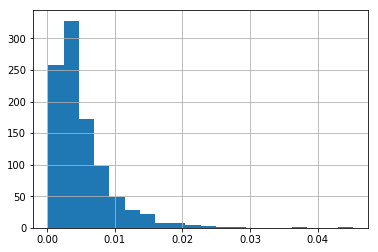

In [153]:
lyft_test_df=pd.merge(lyft_1[['lat', 'bike_id', 'lon']], lyft_2[['lat', 'bike_id', 'lon']], on='bike_id')
# display(lyft_test_df.head())
# print(len(lyft_test_df))
# print(len(lyft_1))
# print(len(lyft_2))
lyft_test_df['distance']=lyft_test_df.apply(lambda x: distance((x['lat_x'], x['lon_x']), (x['lat_y'], x['lon_y'])), axis=1)
# display(spin_test_df.head(50))
lyft_test_df['distance'].hist(bins=20)

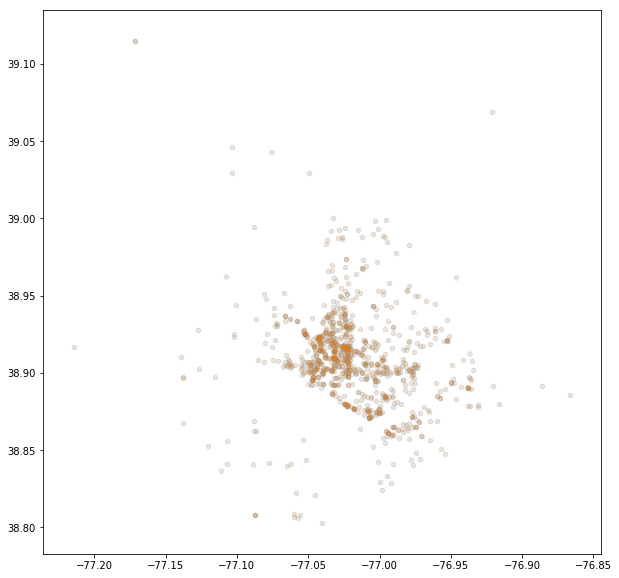

In [152]:
lyft_test_df.loc[lyft_test_df['distance']==0, 'moved']=0
lyft_test_df.loc[lyft_test_df['distance']!=0, 'moved']=1
# plt.figure(figsize=(20, 20))
# lyft_test_df.plot(kind='scatter', x='lon_y', y='lat_y', c='distance', s=20, colormap='Reds', figsize=(10, 10))
plt.figure(figsize=(10, 10))
plt.scatter(x=lyft_test_df['lon_y'], y=lyft_test_df['lat_y'], s=20, alpha=.1)
plt.scatter(x=lyft_test_df['lon_x'], y=lyft_test_df['lat_x'], s=20, alpha=.1)

In [82]:
log_df[log_df['name']=='spin'].head()

,time,jobname,last_updated,len,status,name,size
2,2021-03-26 19:13:21.506874084,GWM1InMM8vaKhHgEvfx7ZA,1616786000,2062,success,spin,16560
9,2021-03-26 19:18:20.069261074,0ygJzO4ulJCRdH8Cd-SFjg,1616786299,2069,success,spin,18672
16,2021-03-26 19:23:21.772555113,uDJAV4RIES7VJ23SwKu6Gg,1616786601,2078,success,spin,18672
23,2021-03-26 19:28:20.067883968,UFjSO8u5rh--EIGZilMwXQ,1616786899,2085,success,spin,18672
30,2021-03-26 19:33:21.278666973,4fGmMg8qH7d-Wg30Ob_zNQ,1616787200,2097,success,spin,18672


#### Spin Analysis (Because ID Doesn't Change)

In [85]:
spin_1=combined_df[combined_df['jobname']=='GWM1InMM8vaKhHgEvfx7ZA']
# lyft_1=lyft_df[lyft_df['last_updated']==1616803337]
spin_2=combined_df[combined_df['jobname']=='0ygJzO4ulJCRdH8Cd-SFjg']
display(spin_1.head())
display(spin_2.head())

,lat,type,bike_id,lon,name_x,is_reserved,is_disabled,jobname,vehicle_type,battery_level,time,last_updated,len,status,company,size
4023,38.9101,NaN,f4278e03-fc77-4b3e-aadc-8fa85d6af96d,-77.0272,NaN,0,0,GWM1InMM8vaKhHgEvfx7ZA,scooter,NaN,2021-03-26 19:13:21.506874084,1616786000,2062,success,spin,16560
4024,38.886,NaN,38fbef8a-5ac5-4950-9af6-ec476e9b05f2,-77.0197,NaN,0,0,GWM1InMM8vaKhHgEvfx7ZA,scooter,NaN,2021-03-26 19:13:21.506874084,1616786000,2062,success,spin,16560
4025,38.9204,NaN,f580bbe9-a779-4fba-90b0-442920dd0c77,-77.0786,NaN,0,0,GWM1InMM8vaKhHgEvfx7ZA,scooter,NaN,2021-03-26 19:13:21.506874084,1616786000,2062,success,spin,16560
4026,38.9049,NaN,7bf43e52-a558-407f-97af-e437537c1580,-76.9791,NaN,0,0,GWM1InMM8vaKhHgEvfx7ZA,scooter,NaN,2021-03-26 19:13:21.506874084,1616786000,2062,success,spin,16560
4027,38.9453,NaN,50eefb0d-c91d-404e-bdf7-517664f5453f,-77.0204,NaN,0,0,GWM1InMM8vaKhHgEvfx7ZA,scooter,NaN,2021-03-26 19:13:21.506874084,1616786000,2062,success,spin,16560


,lat,type,bike_id,lon,name_x,is_reserved,is_disabled,jobname,vehicle_type,battery_level,time,last_updated,len,status,company,size
10776,38.9101,NaN,f4278e03-fc77-4b3e-aadc-8fa85d6af96d,-77.0272,NaN,0,0,0ygJzO4ulJCRdH8Cd-SFjg,scooter,NaN,2021-03-26 19:18:20.069261074,1616786299,2069,success,spin,18672
10777,38.886,NaN,38fbef8a-5ac5-4950-9af6-ec476e9b05f2,-77.0197,NaN,0,0,0ygJzO4ulJCRdH8Cd-SFjg,scooter,NaN,2021-03-26 19:18:20.069261074,1616786299,2069,success,spin,18672
10778,38.9204,NaN,f580bbe9-a779-4fba-90b0-442920dd0c77,-77.0786,NaN,0,0,0ygJzO4ulJCRdH8Cd-SFjg,scooter,NaN,2021-03-26 19:18:20.069261074,1616786299,2069,success,spin,18672
10779,38.9049,NaN,7bf43e52-a558-407f-97af-e437537c1580,-76.9791,NaN,0,0,0ygJzO4ulJCRdH8Cd-SFjg,scooter,NaN,2021-03-26 19:18:20.069261074,1616786299,2069,success,spin,18672
10780,38.9453,NaN,50eefb0d-c91d-404e-bdf7-517664f5453f,-77.0204,NaN,0,0,0ygJzO4ulJCRdH8Cd-SFjg,scooter,NaN,2021-03-26 19:18:20.069261074,1616786299,2069,success,spin,18672


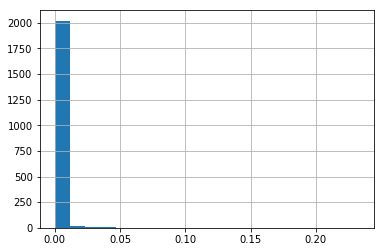

In [154]:
spin_test_df=pd.merge(spin_1[['lat', 'bike_id', 'lon']], spin_2[['lat', 'bike_id', 'lon']], on='bike_id')
# display(lyft_test_df.head())
# print(len(lyft_test_df))
# print(len(lyft_1))
# print(len(lyft_2))
spin_test_df['distance']=spin_test_df.apply(lambda x: distance((x['lat_x'], x['lon_x']), (x['lat_y'], x['lon_y'])), axis=1)
# display(spin_test_df.head(50))
spin_test_df['distance'].hist(bins=20)

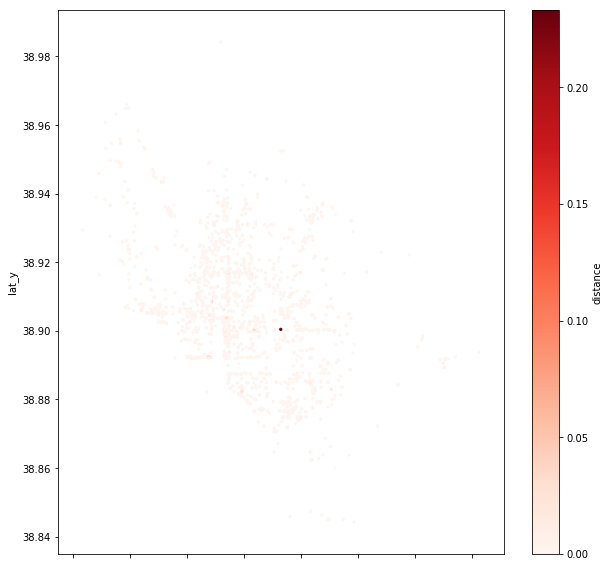

In [155]:
spin_test_df.loc[spin_test_df['distance']==0, 'moved']=0
spin_test_df.loc[spin_test_df['distance']!=0, 'moved']=1
# plt.figure(figsize=(20, 20))
spin_test_df.plot(kind='scatter', x='lon_y', y='lat_y', c='distance', s=5, colormap='Reds', figsize=(10, 10))

In [128]:
spin_test_df['moved'].value_counts()

0.0    1792
1.0     252
Name: moved, dtype: int64